In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define equations and functions {-}

In [36]:
#define equations
def functions(a1, a2, b1, b2, b3, c1, c2, d1, p1, p2, q, r, e, r1, r2, r3, r4):
    def dx1(x1, x2):
#         return ((a1*x1*(p1-x1)+a2*x2*(p1-x1)+e*(p1-x1)-r1*x1)/p1)*100
        return a1*x1*(p1-x1)+a2*x2*(p1-x1)+e*(p1-x1)-r1*x1

    def dx2(x1, x2, y):
#         return ((b1*x1*(p2-x2)+b2*x2*(p2-x2)+b3*y*(p2-x2)+e*(p2-x2)-r2*x2)/p2)*100
        return b1*x1*(p2-x2)+b2*x2*(p2-x2)+b3*y*(p2-x2)+e*(p2-x2)-r2*x2

    def dy(x2, y, z):
#         return ((c1*x2*(q-y)+c2*z*(q-y)+e*(q-y)-r3*y)/q)*100
        return c1*x2*(q-y)+c2*z*(q-y)+e*(q-y)-r3*y

    def dz(y, z):
#         return ((d1*y*(r-z)+e*(r-z)-r4*z)/r)*100
        return d1*y*(r-z)+e*(r-z)-r4*z
    
    def f(vec):
        x1, x2, y, z = vec[0], vec[1], vec[2], vec[3]
        return np.array([dx1(x1,x2),dx2(x1,x2,y),dy(x2,y,z),dz(y,z)])

    return f

In [3]:
#define forward euler updater
def euler(start_vec, f, time_steps, h):
    vec = np.copy(start_vec)
    vecs = []

    for time in time_steps:
        vec = np.copy(vec)
        vec += h*f(vec)
        vecs.append(vec)
    
    return np.array(vecs).T

In [4]:
#define runge-kutta updater
def runge_kutta(start_vec, f, time_steps, h):
    vec = np.copy(start_vec)
    vecs = []
    
    for time in time_steps:
        vec = np.copy(vec)
        k1 = f(vec)
        k2 = f(vec+h*k1/2)
        k3 = f(vec+h*k2/2)
        k4 = f(vec+h*k3)
        vec += (h/6)*(k1+2*k2+2*k3+k4)
        vecs.append(vec)
        
    return np.array(vecs).T

# No transfusion, no death {-}

In [37]:
#implement Euler and Runge-Kutta without transfusions or death
f = functions(10, 5, 5, 1, 1, 1, 1, 1, 5, 5, 100, 100, 0, 0, 0, 0, 0)
time_steps = range(300)
h = 0.0005
start_vec = [0.01, 0, 0, 0]

vecs_e = euler(start_vec, f, time_steps, h)
vecs_rk = runge_kutta(start_vec, f, time_steps, h)

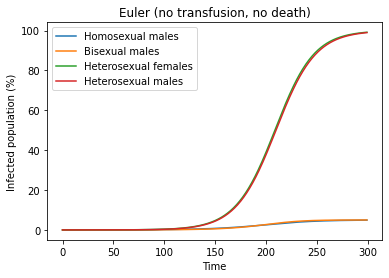

In [38]:
#plot Euler
labels = ['Homosexual males', 'Bisexual males', 'Heterosexual females', 'Heterosexual males']
plt.figure()
for i in range(4):
    plt.plot(time_steps, vecs_e[i], label=labels[i])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Infected population (%)')
plt.title('Euler (no transfusion, no death)')
plt.show()

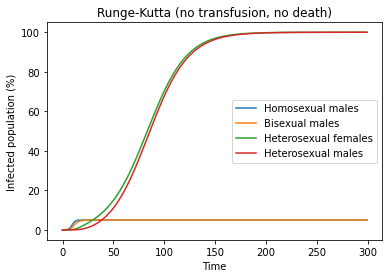

In [7]:
#plot Runge-Kutta
plt.figure()
for i in range(4):
    plt.plot(time_steps, vecs_rk[i], label=labels[i])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Infected population (%)')
plt.title('Runge-Kutta (no transfusion, no death)')
plt.show()

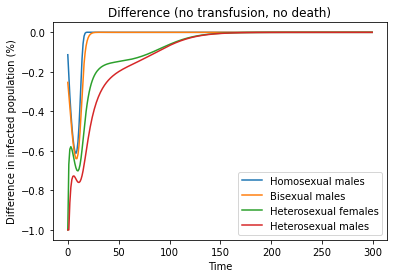

In [8]:
#compare methods for no transfusion, no death
plt.figure()
for i in range(4):
    plt.plot(time_steps, (vecs_e[i]-vecs_rk[i])/vecs_rk[i], label=labels[i])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Difference in infected population (%)')
plt.title('Difference (no transfusion, no death)')
plt.show()

# With transfusion, no death

In [9]:
#implement Euler and Runge-Kutta with blood transfusions but without death for different values of e
f1 = functions(10, 5, 5, 1, 1, 1, 1, 1, 5, 5, 100, 100, 0.001, 0, 0, 0, 0)
f2 = functions(10, 5, 5, 1, 1, 1, 1, 1, 5, 5, 100, 100, 1, 0, 0, 0, 0)
f3 = functions(10, 5, 5, 1, 1, 1, 1, 1, 5, 5, 100, 100, 5, 0, 0, 0, 0)

fs = [f1, f2, f3]
vecs_e = [euler(start_vec, f, time_steps, h) for f in fs]
vecs_rk = [runge_kutta(start_vec, f, time_steps, h) for f in fs]

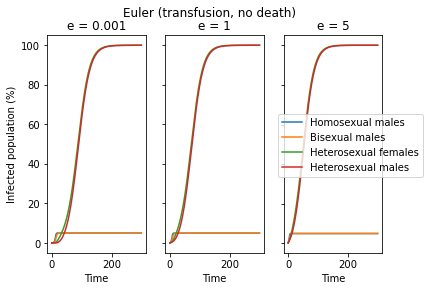

In [10]:
#plot Euler for different values of e
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
for i in range(4):
    ax1.plot(time_steps, vecs_e[0][i], label=labels[i])
    ax2.plot(time_steps, vecs_e[1][i], label=labels[i])
    ax3.plot(time_steps, vecs_e[2][i], label=labels[i])
ax1.set_ylabel('Infected population (%)')
ax1.set_title('e = 0.001')
ax2.set_title('e = 1')
ax3.set_title('e = 5')

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlabel('Time')

fig.suptitle('Euler (transfusion, no death)')
fig.legend(labels, loc='center right');

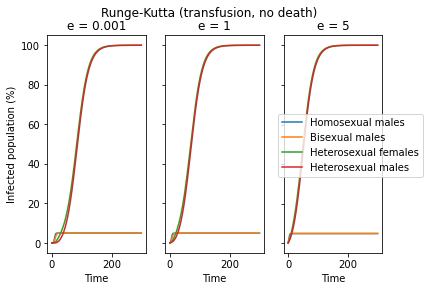

In [11]:
#plot Runge-Kutta for different values of e
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
for i in range(4):
    ax1.plot(time_steps, vecs_rk[0][i], label=labels[i])
    ax2.plot(time_steps, vecs_rk[1][i], label=labels[i])
    ax3.plot(time_steps, vecs_rk[2][i], label=labels[i])
ax1.set_ylabel('Infected population (%)')
ax1.set_title('e = 0.001')
ax2.set_title('e = 1')
ax3.set_title('e = 5')

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlabel('Time')

fig.suptitle('Runge-Kutta (transfusion, no death)')
fig.legend(labels, loc='center right');

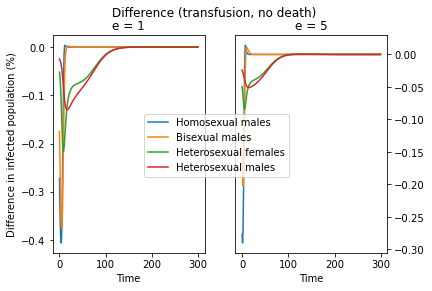

In [12]:
#compare methods for different values of e
fig, (ax1, ax2) = plt.subplots(1, 2)
for i in range(4):
    ax1.plot(time_steps, (vecs_e[1][i]-vecs_rk[1][i])/vecs_rk[1][i], label=labels[i])
    ax2.plot(time_steps, (vecs_e[2][i]-vecs_rk[2][i])/vecs_rk[2][i], label=labels[i])
ax1.set_ylabel('Difference in infected population (%)')
ax1.set_title('e = 1')
ax2.set_title('e = 5')
ax2.yaxis.tick_right()

for ax in fig.get_axes():
#     ax.label_outer()
    ax.set_xlabel('Time')

fig.suptitle('Difference (transfusion, no death)')
fig.legend(labels, loc='center');

# With transfusion, with death

In [13]:
#implement Euler and Runge-Kutta with blood transfusions and with death for different values of rs
f1 = functions(10, 5, 5, 1, 1, 1, 1, 1, 5, 5, 100, 100, 0.001, 0.5, 0.5, 0.5, 0.5)
f2 = functions(10, 5, 5, 1, 1, 1, 1, 1, 5, 5, 100, 100, 0.001, 5, 5, 5, 5)
f3 = functions(10, 5, 5, 1, 1, 1, 1, 1, 5, 5, 100, 100, 0.001, 10, 10, 10, 10)

fs = [f1, f2, f3]
vecs_e = [euler(start_vec, f, time_steps, h) for f in fs]
vecs_rk = [runge_kutta(start_vec, f, time_steps, h) for f in fs]

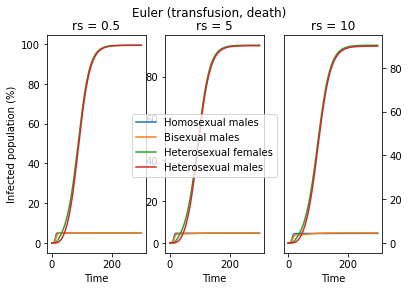

In [14]:
#plot Euler for different values of rs
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
for i in range(4):
    ax1.plot(time_steps, vecs_e[0][i], label=labels[i])
    ax2.plot(time_steps, vecs_e[1][i], label=labels[i])
    ax3.plot(time_steps, vecs_e[2][i], label=labels[i])
ax1.set_ylabel('Infected population (%)')
ax1.set_title('rs = 0.5')
ax2.set_title('rs = 5')
ax3.set_title('rs = 10')
ax3.yaxis.tick_right()

for ax in fig.get_axes():
    ax.set_xlabel('Time')

fig.suptitle('Euler (transfusion, death)')
fig.legend(labels, loc='center');

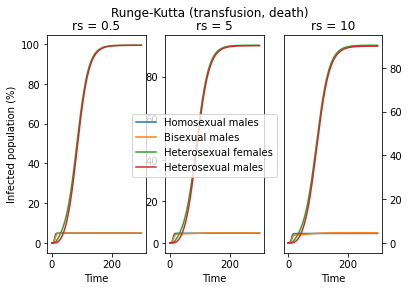

In [15]:
#plot Runge-Kutta for different values of rs
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
for i in range(4):
    ax1.plot(time_steps, vecs_rk[0][i], label=labels[i])
    ax2.plot(time_steps, vecs_rk[1][i], label=labels[i])
    ax3.plot(time_steps, vecs_rk[2][i], label=labels[i])
ax1.set_ylabel('Infected population (%)')
ax1.set_title('rs = 0.5')
ax2.set_title('rs = 5')
ax3.set_title('rs = 10')
ax3.yaxis.tick_right()

for ax in fig.get_axes():
    ax.set_xlabel('Time')

fig.suptitle('Runge-Kutta (transfusion, death)')
fig.legend(labels, loc='center');

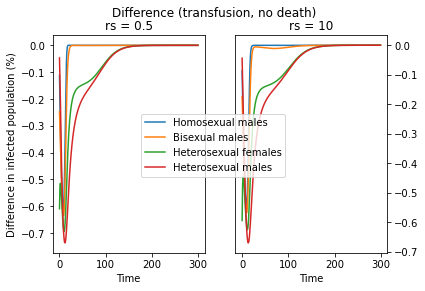

In [16]:
#compare methods for different values of rs
fig, (ax1, ax2) = plt.subplots(1, 2)
for i in range(4):
    ax1.plot(time_steps, (vecs_e[0][i]-vecs_rk[0][i])/vecs_rk[0][i], label=labels[i])
    ax2.plot(time_steps, (vecs_e[2][i]-vecs_rk[2][i])/vecs_rk[2][i], label=labels[i])
ax1.set_ylabel('Difference in infected population (%)')
ax1.set_title('rs = 0.5')
ax2.set_title('rs = 10')
ax2.yaxis.tick_right()

for ax in fig.get_axes():
#     ax.label_outer()
    ax.set_xlabel('Time')

fig.suptitle('Difference (transfusion, no death)')
fig.legend(labels, loc='center');